# Hierarchical Modeling: Combining Information from Exchangeable Experiments

## Introduction

In science, a meta-analysis is used to draw conclusions from a collection of independent peer-reviewed research investigations. In essence, this method is used to provide a greater amount of explanatory power about a situation of interest by combining information from multiple sources. This is why meta-analyses are regarded as one of the highest forms of scientific inference.

Hierarchical modeling is a method of statistical inference that is used to combine information from multiple exchangeable experiments to produce an inference, which makes it a powerful tool in meta-analysis and sciences where repeated experiments are performed, but also provides a structure which can lend incredible utility to anyone who works with data structured in a hierarchical manner.

The "hierarchy" in hierarchical modeling describes a fairly simple Bayesian network structure: at the bottom of the hierarchy is the observed data, which is generated from some distribution with parameters which we would like to infer. These parameters inhabit the next level of the hierarchy. Each experiment produces some data, from which it will be the task of the researcher to infer some quantities or qualities of interest, which are called parameters. In hierarchical modeling, it is assumed that these parameters are also drawn from some distribution; a "hyper" distribution, which describes how the parameters for each individual experiment may be distributed. 

## The Hierarchical Framework

A helpful anaology is to think of a sequence of experiments being performed to study one particular phenomenon. Gelman et al in BDA3 introduce the concept of hierarchcial modeling with a study that involved a collection of rat cages, each with numerous rats, and was investigating how many rats were found to have tumors. Each cage $i$ had $n_i$ rats, and $y_i$ rats out of $n_i$ were measured to have tumors. We will speak here of $i$ referring to an experiment, and $y_i$ referring to the data collected from experiment $i$. 

After visualizing our data, we construct a probability model $p(y | \theta)$, which describes the likelihood of observing dataset $y$ if parameters $\theta$ were chosen. For each dataset $y_i$, we could apply this probability model $p(y_i | \theta_i)$ and use Bayes' Theorem to infer the experiment's parameters $\theta_i$, which is done in "standard" Bayesian inference; each experiment is independent, and the data was collected independently, so the parameters should be inferred independently as well, right?

For simple statistical applications inferring the parameters independently is a fine strategy. And often, it's the only tool in the toolbox of someone who is relatively untrained in statistics. However, these results fail to appropriately treat the case when we would like to combine information from multiple experiments. 

If you worked in something like machine learning, where the model is not something indended to be interepreted by humans, the answer to combining information from multiple experiments is to treat the data as if it came from one grand experiment; just combine all the data sources. Machine learning models are typically complex enough to be able to infer their parameters enough from the features of even very large and complicated datasets to recognize patterns. Multimodel, overdispersed, clustered, highly correlated, and generally badly behaved datasets don't really pose much of a problem to machine learning algorithms with the right feature engineering. The actual structure of the data is irrelevant to many learning problems because of the complexity of the models involved. 

This is part of the reason I was never really interested in machine learning. The predictive power of machine learning models is interesting, but there isn't much knowledge to be gained from using a machine learning model to describe or predict something (other than the fact that the model actually could or couldn't predict that thing). Mathematicians study models in order to study systems, but also to study the interesting dynamics of the models they build, and to study the modeling process itself. Simple machine learning models, like linear classifiers, might provide some interesting results in these terms, but universal approximators like complex neural networks are, well, _boring_ with respect to these things. A machine learning engineer builds a model to understand one particular kind of system; an instance of a system, if the reader allows. A mathematician builds models that are _interpretable_, with parameters that represent, at least in part, some concept in the "real world". This allows the mathematician to understand how the dynamics of the system would behave differently if the parameters of its behavior were different, allowing the researcher to analyze all possible modes of behavior of the system. Statistical models, when constructed based on the nature of the problem, and not  The nature of these models, combined with a method for understanding the undertainty in their realization in the real world (such as Bayesian Inference), always fascinated me way more than the fact that a neural network could detect a cat in a picture. 

Thus, in statistics, we are more nuanced with the way in which we combine information from independent data sources. The structure of hierarchical inference is a good general framework for this, provided some assumptions about the structure of the problem are reasonable. It must be assumed that there is no extra information that can be provided about the outcome of each experiment from qualities about the experiments themselves. This assumption, like many in statistical modeling, is not predicated on what the researcher believes are the _actual dynamics of the system_, rather is an assumption made as a result of what information the researcher has access to. Predicting the divorce rate in the 50th state after estimating divorce rates in the other 49 states will yield a different result if I tell you the 50th state is unknown, versus if I tell you the 50th state is Nevada or Utah.

In general, a hierarchical model is structured as a hierarchy of inferential dependence. Each dataset $y_i$ is drawn from a model $p(\cdot|\theta_i)$ with parameters $\theta_i$. In turn each $\theta_i$ is drawn from a model $p(\cdot|\phi)$, where $\phi$ are some hyperparameters that describe the distribution of each $\theta_i$. Finally, these hyperparameters are drawn from some hyperprior distribution $p(\cdot)$. The whole model can be summarized in sampling notation as follows:

$$\phi \sim p(\phi)$$
$$\theta_i \sim p(\theta | \phi)$$
$$y_i \sim p(y | \theta_i)$$


In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np

C:\Users\carte\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\carte\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    obs = pm.Normal('obs', mu=mu, sigma=1, observed=np.random.randn(100))
    

In [7]:
with model:
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████| 8000/8000 [00:05<00:00, 1477.65draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016CD613C748>,
      dtype=object)

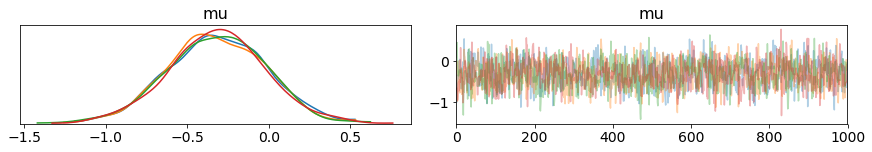

In [4]:
pm.traceplot(trace)